<a href="https://colab.research.google.com/github/Imokut/deeplense_project/blob/main/test_1/Deeplense_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Needed libraries


In [ ]:
# !pip install tensorflow
# !pip install scipy
# !pip install matplotlib
# !pip install gdown
# !pip install pandas

     |████████████████████████████████| 13.0 MB 4.8 MB/s eta 0:00:01
     |████████████████████████████████| 345 kB 93.5 MB/s eta 0:00:01


In [10]:
# @title Import Libraries and Dependencies
# import zipfile
import os
import numpy as np
import tensorflow as tf
import zipfile
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
import warnings
from tensorflow.keras.utils import plot_model
warnings.filterwarnings('ignore')


## Download Dataset

You can skip this if the dataset is already downloaded in the working directory

In [3]:
# @title Download test dataset
!gdown --id 1ZEyNMEO43u3qhJAwJeBZxFBEYc_pVYZQ

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1ZEyNMEO43u3qhJAwJeBZxFBEYc_pVYZQ
From (redirected): https://drive.google.com/uc?id=1ZEyNMEO43u3qhJAwJeBZxFBEYc_pVYZQ&confirm=t&uuid=ad1854c0-ae09-4fe4-9ba2-31c8bcdd3791
To: /content/dataset.zip
100% 1.13G/1.13G [00:12<00:00, 93.4MB/s]


In [6]:
# Extract zip file

local_zip = "./dataset.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall('./dataset')

zip_ref.close()

In [16]:
# Get the current working directory
cwd = os.getcwd()

# Change directory to the "dataset" directory
os.chdir(os.path.join(cwd, "dataset"))

# List the contents of the directory
contents = os.listdir()

# Print the contents
print(contents)


['train', 'val', '.DS_Store']


## Save the directories to a variable and Display some of the images

In [17]:
# @title Set Directories

#Train Data
train_dir = "./dataset/dataset/train"
train_no_dir = './dataset/dataset/train/no'
train_sphere_dir = './dataset/dataset/train/sphere'
train_vort_dir = './dataset/dataset/train/vort'

#Validation Data
val_dir = "./dataset/dataset/val"
val_no_dir = './dataset/dataset/val/no'
val_sphere_dir = './dataset/dataset/val/sphere'
val_vort_dir = './dataset/dataset/val/vort'

In [14]:
# os.listdir(train_no_dir)[:10]

In [22]:
os.listdir("/content/dataset/dataset")

['train', 'val', '.DS_Store']

In [18]:
print(f"Total training no images: {len(os.listdir(train_no_dir))}")
print(f"Total training sphere images: {len(os.listdir(train_sphere_dir))}")
print(f"Total training vort images: {len(os.listdir(train_vort_dir))}")
print(f"Total validation no images: {len(os.listdir(val_no_dir))}")
print(f"Total validation sphere images: {len(os.listdir(val_sphere_dir))}")
print(f"Total validation vort images: {len(os.listdir(val_vort_dir))}")

FileNotFoundError: [Errno 2] No such file or directory: './dataset/dataset/train/no'

### Transform data

In [ ]:
def return_category(label):
  dic = {'vort': 0, 'sphere': 1, 'no': 2}
  for i in dic:
    if dic[i] == label:
      return i
  pass

def return_label(category):
  dic = {'vort': 0, 'sphere': 1, 'no': 2}
  if category in dic:
    return dic[category]
  pass

In [ ]:
def load_data(folder):
  data = []
  labels = []
  for category in ['vort', 'sphere', 'no']:
    category_dir = os.path.join(folder, category)
    label = return_label(category)
    for filename in os.listdir(category_dir):
      if filename.endswith(".npy"):
        img_path = os.path.join(category_dir, filename)
        img = np.load(img_path).squeeze()
        data.append(img)
        labels.append(label)
        del(img_path, img)
    del(category_dir, label, filename)
  del(category)

  return np.array(data), np.array(labels)


In [ ]:
def shuffle_data(data, labels):
    indices = np.arange(len(labels))
    np.random.shuffle(indices)
    data_s = np.array(data)[indices]
    del(data)
    labels_s = np.array(labels)[indices]
    del(labels, indices)
    return data_s, labels_s

In [ ]:
x_trains, y_trains = load_data(train_dir)
x_vals, y_vals = load_data(val_dir)

In [ ]:
x_train_f = x_trains.astype('float32')
del(x_trains)
x_val_f = x_vals.astype('float32')
del(x_vals)

In [ ]:
x_train, y_train = shuffle_data(x_train_f, y_trains)
del(x_train_f, y_trains)

In [ ]:
x_val, y_val = shuffle_data(x_val_f, y_vals)
del(x_val_f, y_vals)

In [ ]:
print(f"Training images has shape: {x_train.shape} and dtype: {x_train.dtype}")
print(f"Training labels has shape: {y_train.shape} and dtype: {y_train.dtype}")
print(f"Validation images has shape: {x_val.shape} and dtype: {x_val.dtype}")
print(f"Validation labels has shape: {y_val.shape} and dtype: {y_val.dtype}")

Training images has shape: (30000, 150, 150) and dtype: float32
Training labels has shape: (30000,) and dtype: int64
Validation images has shape: (7500, 150, 150) and dtype: float32
Validation labels has shape: (7500,) and dtype: int64


### Display 10 images

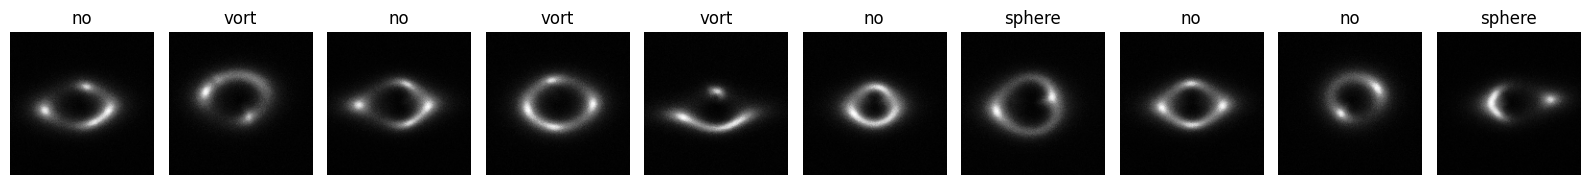

In [ ]:
def plot_categories(training_images, training_labels):
  fig, axes = plt.subplots(1, 10, figsize=(16, 15))
  axes = axes.flatten()

  num_integers = 10
  random_integers = np.random.randint(0, 30000, size=num_integers)

  for i, k in enumerate(random_integers):
    img = training_images[k]
    img = np.expand_dims(img, axis=-1)
    img = array_to_img(img)
    ax = axes[i]
    ax.imshow(img, cmap="Greys_r")
    ax.set_title(f"{return_category(training_labels[k])}")
    ax.set_axis_off()

  plt.tight_layout()
  plt.show()

plot_categories(x_train, y_train)

## Set up an Image Generator

In [ ]:
def train_val_generators(training_images, training_labels, validation_images, validation_labels):
  """
  Creates the training and validation data generators

  Args:
    training_images (array): parsed images from the train folder
    training_labels (array): parsed labels from the train folder
    validation_images (array): parsed images from the test folder
    validation_labels (array): parsed labels from the test folder

  Returns:
    train_generator, validation_generator - tuple containing the generators
  """

  # Add another dimension to the data
  training_images = np.expand_dims(training_images, 3)
  validation_images = np.expand_dims(validation_images, 3)


  train_datagen = ImageDataGenerator(
      rescale = 1/20,
      rotation_range = 40,
      width_shift_range= 0.2,
      height_shift_range = 0.2,
      shear_range = 0.2,
      zoom_range = 0.2,
      horizontal_flip = True,
      fill_mode = 'nearest'
  )



  train_generator = train_datagen.flow(x=training_images,
                                       y=training_labels,
                                       batch_size=32)



  validation_datagen = ImageDataGenerator(rescale = 1/20)


  validation_generator = validation_datagen.flow(x=validation_images,
                                                 y=validation_labels,
                                                 batch_size=32)


  return train_generator, validation_generator

In [ ]:
# Test the generators
train_generator, validation_generator = train_val_generators(x_train, y_train, x_val, y_val)

print(f"Images of training generator have shape: {train_generator.x.shape}")
print(f"Labels of training generator have shape: {train_generator.y.shape}")
print(f"Images of validation generator have shape: {validation_generator.x.shape}")
print(f"Labels of validation generator have shape: {validation_generator.y.shape}")

Images of training generator have shape: (30000, 150, 150, 1)
Labels of training generator have shape: (30000,)
Images of validation generator have shape: (7500, 150, 150, 1)
Labels of validation generator have shape: (7500,)


In [ ]:
del(x_train, y_train, x_val, y_val)


## Build the Model

In [ ]:
def create_model(my_learning_rate, metrics):
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(150, 150, 1)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(3, activation='softmax')
  ])

  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss = 'sparse_categorical_crossentropy',
                metrics=metrics)


  return model

In [ ]:
def train_model(model, train_generator, validation_generator, epochs=20,
                batch_size=32, verbose=1, validation_steps=3, steps_per_epoch=20, shuffle=True):
  """Train the model by feeding it data."""

  history = model.fit(train_generator, epochs=epochs, validation_data = validation_generator, verbose = verbose, validation_steps=validation_steps,
                      batch_size=batch_size, steps_per_epoch=steps_per_epoch, shuffle=shuffle)


  # To track the progression of training, gather a snapshot
  # of the model's metrics at each epoch.
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist

In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.003
epochs = 50
batch_size = 32
METRICS = [
  "accuracy",
  #tf.keras.metrics.AUC(name='auc')
]
steps_per_epoch=20
shuffle = False

# Establish the model's topography.
my_model = create_model(learning_rate, METRICS)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, train_generator, validation_generator, epochs=epochs, steps_per_epoch=steps_per_epoch, shuffle=shuffle)



/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 591ms/step - accuracy: 0.3074 - loss: 1.1856 - val_accuracy: 0.2917 - val_loss: 1.1014
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 591ms/step - accuracy: 0.3487 - loss: 1.0984 - val_accuracy: 0.3021 - val_loss: 1.1012
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 597ms/step - accuracy: 0.3214 - loss: 1.0997 - val_accuracy: 0.3438 - val_loss: 1.0985
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 566ms/step - accuracy: 0.3357 - loss: 1.0983 - val_accuracy: 0.3229 - val_loss: 1.0999
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 559ms/step - accuracy: 0.3192 - loss: 1.0988 - val_accuracy: 0.2396 - val_loss: 1.1008
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 620ms/step - accuracy: 0.3096 - loss: 1.0991 - val_accuracy: 0.3958 - val_loss: 1.0943
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 591ms/step - accuracy: 0.3032 - loss: 1.1007 - val_accuracy: 0.3229 - val_loss: 1.0990
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 604ms/step - accuracy: 0.3405 - loss: 1.0987 - val_accu

2024-03-22 05:55:47.287934: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/home/studio-lab-user/.conda/envs/default/lib/python3.9/contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 533ms/step - accuracy: 0.3609 - loss: 1.0927 - val_accuracy: 0.4583 - val_loss: 1.0972
Epoch 48/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 580ms/step - accuracy: 0.3542 - loss: 1.0989 - val_accuracy: 0.3229 - val_loss: 1.0994
Epoch 49/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 611ms/step - accuracy: 0.3149 - loss: 1.0996 - val_accuracy: 0.2917 - val_loss: 1.0996
Epoch 50/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 583ms/step - accuracy: 0.3207 - loss: 1.0989 - val_accuracy: 0.4062 - val_loss: 1.0968


## PLot model metrics

In [ ]:
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()
  plt.show()

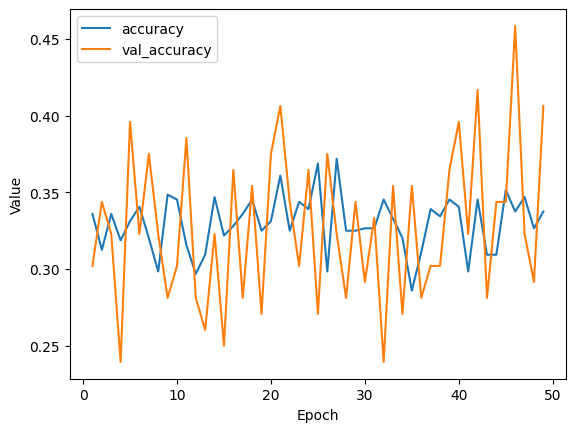

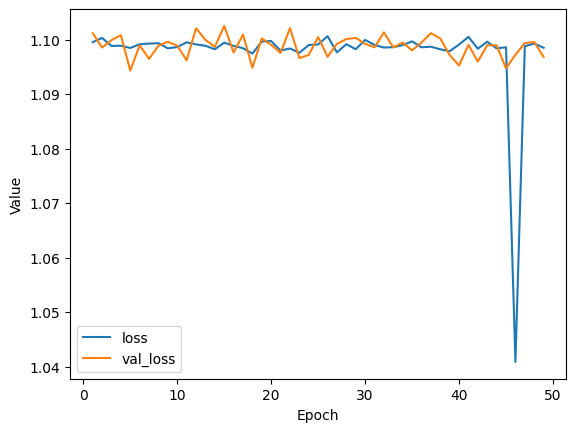

In [ ]:
list_of_metrics_to_plot = ['accuracy', 'val_accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

list_of_metrics_to_plot = ['loss', 'val_loss']
plot_curve(epochs, hist, list_of_metrics_to_plot)

## Model Evaluation